# Домашнее задание

http://prntscr.com/umci7o

1. Возьмите датасет с цветками iris’а (функция load_iris из библиотеки sklearn)
2. Оставьте два признака - sepal_length и sepal_width и целевую переменную - variety
3. Разделите данные на выборку для обучения и тестирования
4. Постройте модель LDA
5. Визуализируйте предсказания для тестовой выборки и центры классов
6. Отбросьте целевую переменную и оставьте только два признака - sepal_length и sepal_width
7. Подберите оптимальное число кластеров для алгоритма kmeans и визуализируйте полученную кластеризацию

In [1]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors

cmap = colors.LinearSegmentedColormap(
    'red_blue_classes',
    {'red': [(0, 1, 1), (1, 0.7, 0.7)],
     'green': [(0, 0.7, 0.7), (1, 0.7, 0.7)],
     'blue': [(0, 0.7, 0.7), (1, 1, 1)]})
plt.cm.register_cmap(cmap=cmap)

In [8]:
# 1. Возьмите датасет с цветками iris’а (функция load_iris из библиотеки sklearn)
iris = pd.DataFrame(load_iris().data, columns=load_iris().feature_names)
iris_class = load_iris().target

# 2. Оставьте два признака - sepal_length и sepal_width и целевую переменную - variety
iris = iris[['sepal length (cm)', 'sepal width (cm)']]

iris.head()

,sepal length (cm),sepal width (cm)
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6


In [3]:
# 3. Разделите данные на выборку для обучения и тестирования

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(iris, iris_class, test_size=0.5)

In [4]:
# 4. Постройте модель LDA

# импортируем LDA-функционал
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis()

# обучаем данные
lda.fit(X_train, y_train)

# делаем прогноз на тестовой выборке
lda.predict(X_test)

array([1, 0, 1, 1, 1, 2, 0, 1, 1, 2, 2, 1, 2, 1, 0, 1, 0, 2, 2, 2, 0, 0,
       2, 2, 1, 1, 2, 1, 0, 0, 0, 2, 0, 1, 0, 1, 1, 2, 2, 1, 1, 1, 0, 1,
       1, 2, 2, 2, 0, 2, 0, 0, 0, 2, 2, 1, 1, 2, 1, 1, 2, 0, 0, 1, 0, 1,
       2, 0, 0, 2, 2, 1, 1, 1, 2])

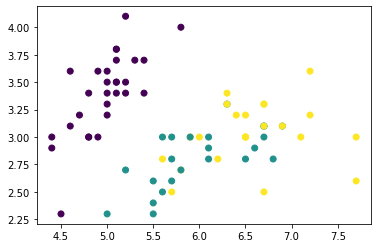

In [5]:
# 5. Визуализируйте предсказания для тестовой выборки и центры классов

from sklearn.metrics import accuracy_score

accuracy_score(y_test, lda.predict(X_test))

# коэффициенты дискриминатных линий
lda.coef_

# визуализируем дискриминантную линию только по 2 признакам
plt.scatter(X_train['sepal length (cm)'], X_train['sepal width (cm)'], c=y_train)
plt.show()

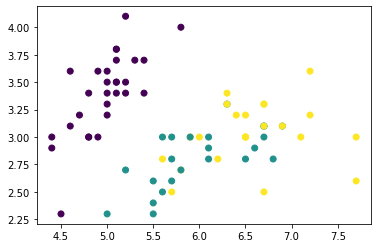

In [6]:
small_train = X_train[(y_train == 0) | (y_train == 1) | (y_train == 2)]
small_train = small_train[['sepal length (cm)', 'sepal width (cm)']]
sy_train = y_train[(y_train == 0) | (y_train == 1) | (y_train == 2)]
small_test = X_test[(y_train == 0) | (y_train == 1) | (y_train == 2)]
small_test = small_test[['sepal length (cm)', 'sepal width (cm)']]
sy_test = y_test[(y_train == 0) | (y_train == 1) | (y_train == 2)]

plt.scatter(small_train['sepal length (cm)'], small_train['sepal width (cm)'], c=sy_train)
plt.show()

0.8266666666666667

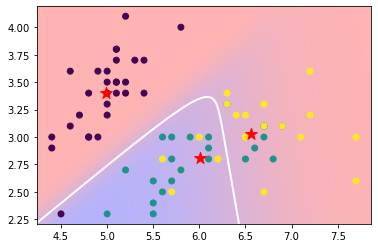

In [7]:
lda_small = LinearDiscriminantAnalysis()
lda_small.fit(small_train, sy_train)

# посмотрим на наши центроиды
lda_small.means_

# сам scatter plot
plt.scatter(small_train['sepal length (cm)'], small_train['sepal width (cm)'], c=sy_train)
# центроиды
plt.scatter(lda_small.means_[:, 0], lda_small.means_[:, 1], c='r', s=150, marker='*')

# делаем условную "сетку"
nx, ny = 200, 100
x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()
xx, yy = np.meshgrid(np.linspace(x_min, x_max, nx),
                         np.linspace(y_min, y_max, ny))

# предсказываем класс каждой точки нашей сетки
Z = lda_small.predict_proba(np.c_[xx.ravel(), yy.ravel()])
Z = Z[:, 1].reshape(xx.shape)

# закрашиваем классы разными цветами
plt.pcolormesh(xx, yy, Z, cmap='red_blue_classes',
                   norm=colors.Normalize(0., 1.), zorder=-1)

# отделяем друг от друга
plt.contour(xx, yy, Z, [0.5], linewidths=2., colors='white')

accuracy_score(sy_test, lda_small.predict(small_test))

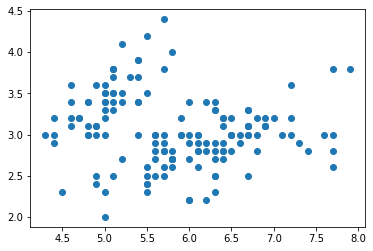

In [65]:
# 6. Отбросьте целевую переменную и оставьте только два признака - sepal_length и sepal_width
# 7. Подберите оптимальное число кластеров для алгоритма kmeans и визуализируйте полученную кластеризацию

X = iris.to_numpy()

plt.scatter(X[:, 0], X[:, 1])

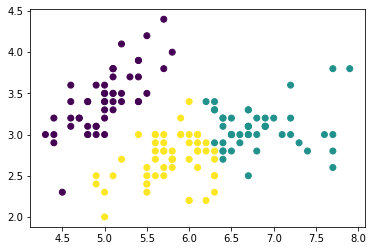

In [66]:
# явно указываем количество кластеров
kmeans = KMeans(n_clusters=3)
# fit_predict обучается на данных и каждому объекту присваивает кластер
clusters = kmeans.fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=clusters)

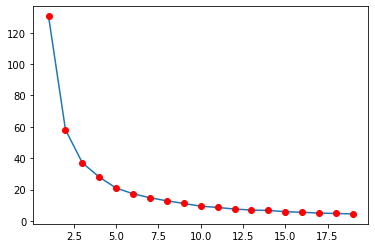

In [70]:
# строим график локтя

# создаем список для инерции
k_inertia = []
# задаем диапазон кластеров
ks = range(1, 20)

for k in ks:
    clf_kmeans = KMeans(n_clusters=k)
    clusters_kmeans = clf_kmeans.fit_predict(X)
    # добавляем инерцию каждой модели в список
    k_inertia.append(clf_kmeans.inertia_)
    
plt.plot(ks, k_inertia)
plt.plot(ks, k_inertia ,'ro')